In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [65]:
# Datos
data = [
    [1500, 30, 80],
    [1200, 33, 82.5],
    [2200, 34, 100.8],
    [2100, 42, 90],
]

# Nombres de columnas
columns = ['Salary', 'Age', 'Weight']

# Crear DataFrame
df = pd.DataFrame(data, columns=columns)

# Mostrar DataFrame
print(df)


   Salary  Age  Weight
0    1500   30    80.0
1    1200   33    82.5
2    2200   34   100.8
3    2100   42    90.0


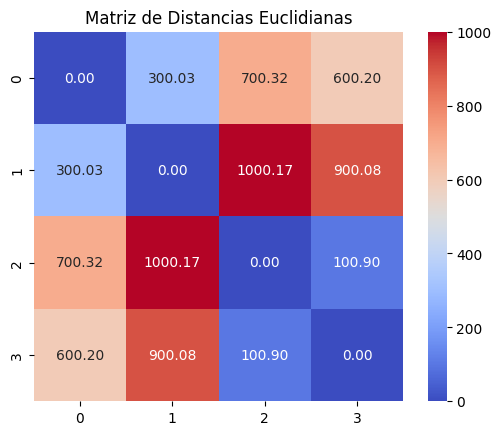

In [47]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Tu DataFrame df ya existe

# Calcular la matriz de distancias euclidianas
dist_matrix = pairwise_distances(df, metric='euclidean')

# Convertir la matriz de distancias a un DataFrame de Pandas para usar en sns.heatmap
dist_df = pd.DataFrame(dist_matrix, index=df.index, columns=df.index)

sns.heatmap(dist_df, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Matriz de Distancias Euclidianas')
# Guardamos la imagen
plt.savefig('dist_matrix_2.png')  # Guardar como imagen
plt.show()



In [51]:
# Distancia pero solo de la columna de edad
dist_matrix = pairwise_distances(df, metric='euclidean')

# mostrar la matriz de distancias con indices y columnas
dist_df = pd.DataFrame(dist_matrix, index=df.index, columns=df.index)
print(dist_df)


            0            1            2           3
0    0.000000   300.025416   700.320384  600.203299
1  300.025416     0.000000  1000.167931  900.076247
2  700.320384  1000.167931     0.000000  100.899158
3  600.203299   900.076247   100.899158    0.000000


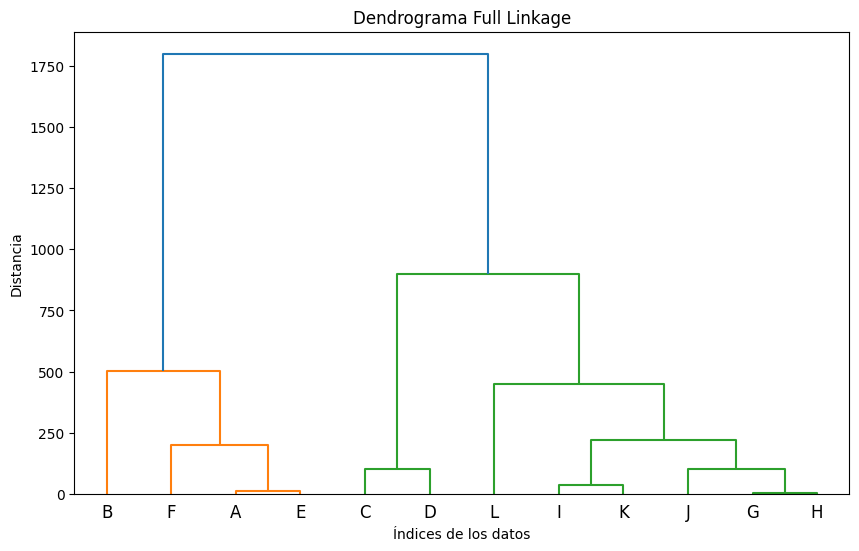

In [3]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Datos
data = [
    [30, 1500, 80],
    [33, 1200, 82.5],
    [34, 2200, 100.8],
    [42, 2100, 90],
    [29, 1500, 67],
    [19, 1700, 60],
    [50, 3000, 77],
    [55, 3000, 77],
    [31, 2800, 87],
    [46, 2900, 70],
    [36, 2780, 57],
    [48, 2550, 64]
]

# Nombres de columnas
columns = ['Age', 'Weight','Salary']

# Crear DataFrame con índices personalizados
df = pd.DataFrame(data, columns=columns, index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
)

# Calcular la matriz de enlaces
linkage_matrix = linkage(df, method='complete', metric='euclidean')

# Mostrar el dendrograma
plt.figure(figsize=(10, 6))
dn = dendrogram(linkage_matrix, labels=df.index)
plt.xlabel('Índices de los datos')
plt.ylabel('Distancia')
plt.title('Dendrograma Full Linkage')
plt.savefig('dendrograma_full_linkage.png')  # Guardar como imagen
plt.show()


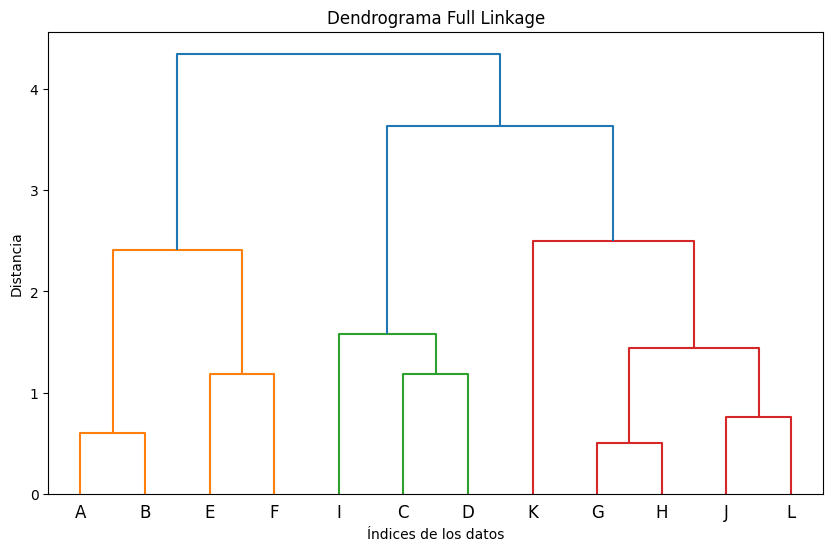

In [4]:
# estandarizamos los datos para que tengan media 0 y desviación estándar 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# repetimos y obtenemos el dendrograma
linkage_matrix = linkage(df_scaled, method='complete', metric='euclidean')

# Mostrar el dendrograma
plt.figure(figsize=(10, 6))
dn = dendrogram(linkage_matrix, labels=df.index)
plt.xlabel('Índices de los datos')
plt.ylabel('Distancia')
plt.title('Dendrograma Full Linkage')
plt.savefig('dendrograma_full_linkage_2.png')  # Guardar como imagen
plt.show()

In [30]:
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np

# Datos originales
data = [
    [30, 1500, 80],
    [33, 1200, 82.5],
    [34, 2200, 100.8],
    [42, 2100, 90],
    [29, 1500, 67],
    [19, 1700, 60],
    [50, 3000, 77],
    [55, 3000, 77],
    [31, 2800, 87],
    [46, 2900, 70],
    [36, 2780, 57],
    [48, 2550, 64]
]

# Nombres de columnas
columns = ['Age', 'Weight', 'Salary']

# Crear DataFrame con índices personalizados
df = pd.DataFrame(data, columns=columns, index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'])

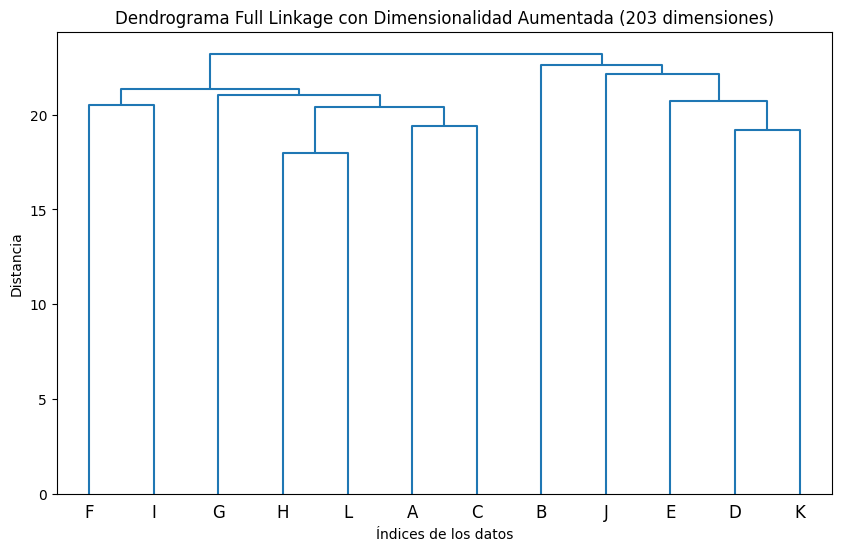

In [40]:
# Agregar características aleatorias
num_nuevas_caracteristicas = 60  # Elige el número de nuevas características
for i in range(num_nuevas_caracteristicas):
    nueva_caracteristica = np.random.rand(len(df))  # Generar valores aleatorios para la nueva característica
    df[f'Nueva_{i+1}'] = nueva_caracteristica  # Agregar la nueva característica al DataFrame

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Calcular la matriz de enlaces
linkage_matrix = linkage(df_scaled, method='complete', metric='euclidean')

# Mostrar el dendrograma
plt.figure(figsize=(10, 6))
dn = dendrogram(linkage_matrix, labels=df.index)
plt.xlabel('Índices de los datos')
plt.ylabel('Distancia')
plt.title(f'Dendrograma Full Linkage con Dimensionalidad Aumentada ({len(df.columns)} dimensiones)')
plt.savefig('dendrograma_full_linkage_aumentado.png')  # Guardar como imagen
plt.show()
